In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('simple_example.csv')
features = ['x']
labels = ['y']
# Divide into training set and test set
train_data = data[:15]
test_data = data[15:]

In [4]:
def evaluate_model(model, test_data, features, labels, featurizer):
    '''
    Calculate the mean square error and coefficient of determination of the linear model

    Parameters
    ----
    model : LinearRegression, trained linear model

    testData : DataFrame, test data

    features : list[str], feature name list

    labels : list[str], label name list

    Returns
    ----
    error : np.float64, mean square error

    score : np.float64, coefficient of determination
    '''
    # Mean Squared Error, the smaller the mean squared error, the better
    error = model.predict(featurizer.fit_transform(test_data[features])) - test_data[labels]
    mse = np.mean(error.values ** 2)
    # Coefficient of determination. The closer the coefficient of determination is to 1, the better.
    score = model.score(featurizer.fit_transform(test_data[features]), test_data[labels])
    return mse, score

In [5]:
def train_model(train_data, features, labels, featurizer):
    '''
    Use training data to estimate model parameters

    Parameters
    ----
    trainData : DataFrame, training data set, including features and labels

    features : feature name list

    labels : label name list

    Return
    ----
    model : LinearRegression, trained linear model
    '''
    # Create a linear regression model
    model = linear_model.LinearRegression(fit_intercept=False)
    # Train the model and estimate model parameters
    model.fit(featurizer.fit_transform(train_data[features]), train_data[labels])
    return model

In [8]:
def visualize_model(model, featurizer, data, features, labels, evaluation):
    '''
    Model Visualization
    '''
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    # Create a graphics frame
    fig = plt.figure(figsize=(10, 10), dpi=100)
    # Draw only one picture in the graphics box
    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1)
        _visualization(ax, data, model[i], featurizer[i], evaluation[i], features, labels)
    return plt

def _visualization(ax, data, model, featurizer, evaluation, features, labels):
    '''
    '''
    # Draw a dot graph, using blue dots to represent the original data
    ax.scatter(data[features], data[labels], color='b')
    # Draw a line graph, using red lines to represent model results
    ax.plot(data[features], model.predict(featurizer.fit_transform(data[features])), color='r')
    # Display the mean square error and coefficient of determination
    ax.text(0.01, 0.99, f'Mean square error: {evaluation[0]:.3f}\ndecisive factor: {evaluation[1]:.3f}',
            style='italic', verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes, color='m', fontsize=16)

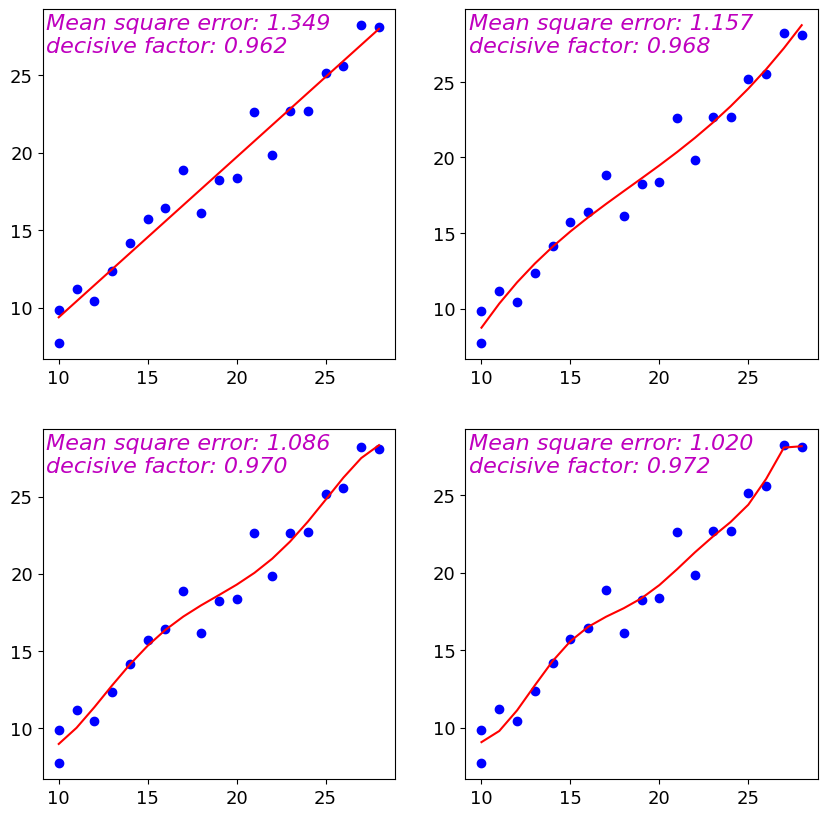

In [9]:
# Do not distinguish between training and test data sets
featurizer = []
model = []
evaluation = []
for i in range(1, 11, 3):
    featurizer.append(PolynomialFeatures(degree=i))
    # Generate and train the model
    model.append(train_model(data, features, labels, featurizer[-1]))
    # Evaluate the model effect
    evaluation.append(evaluate_model(model[-1], data, features, labels, featurizer[-1]))
# Graphical model results
re = visualize_model(model, featurizer, data, features, labels, evaluation)
re.savefig('linear_ml_overfitting1.png', dpi=200)

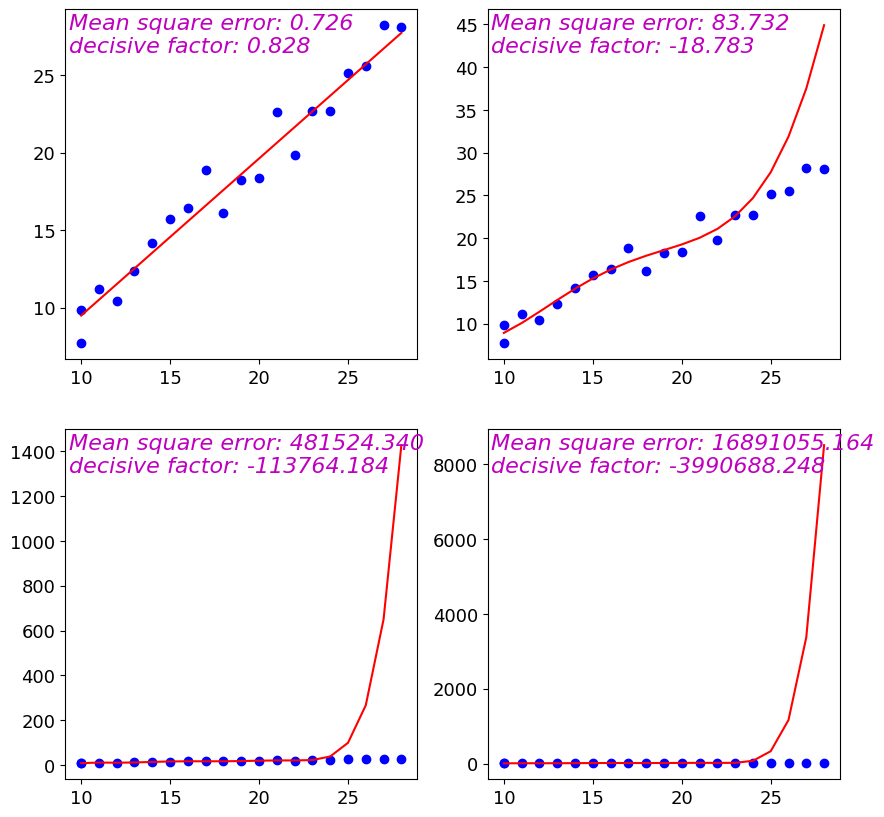

In [10]:
# Use the training data set to train data and the test data set to
featurizer = []
overfitting_model = []
overfitting_evaluation = []
for i in range(1, 11, 3):
    featurizer.append(PolynomialFeatures(degree=i))
    # Generate and train the model
    overfitting_model.append(train_model(train_data, features, labels, featurizer[-1]))
    # Evaluate the model effect
    overfitting_evaluation.append(
        evaluate_model(overfitting_model[-1], test_data, features, labels, featurizer[-1]))
# Graphical model results
re = visualize_model(overfitting_model, featurizer, data, features, labels, overfitting_evaluation)
re.savefig('linear_ml_overfitting2.png', dpi=200)